## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузка данных
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

df_name = [df_full, df_train, df_test]

In [3]:
# Первый взгляд
for i in df_name:    
    display(i.head(3))
    display(i.tail(3))
    #i.info()
    print('##############################################################################')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
19438,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575


##############################################################################


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
14148,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575


##############################################################################


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5287,2017-12-31 21:59:59,171.135718,15.993669,8.07,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.07,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284
5289,2017-12-31 23:59:59,181.556856,14.995850,8.07,1.623454,1498.096303,-499.796922,1501.743791,-505.146931,1499.535978,...,20.034715,-500.728588,14.914199,-499.948518,10.986607,-500.658027,8.989497,-500.337588,8.988632,-500.764937


##############################################################################


In [4]:
# Первый взгляд
for i in df_name: 
    i.info()
    print('----------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [5]:
# Дупликаты и пропуски
for i in df_name:    
    print('----------------------------------',  '------------------------------------')
    display(i.isna().sum())
    print('#############################################')
    display("Явные дупликаты:", i.duplicated().sum())
    print()
    print('----------------------------------',  '------------------------------------')
    #display(i.corr())
    print('----------------------------------',  '------------------------------------')

---------------------------------- ------------------------------------


date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

#############################################


'Явные дупликаты:'

0


---------------------------------- ------------------------------------
---------------------------------- ------------------------------------
---------------------------------- ------------------------------------


date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

#############################################


'Явные дупликаты:'

0


---------------------------------- ------------------------------------
---------------------------------- ------------------------------------
---------------------------------- ------------------------------------


date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

#############################################


'Явные дупликаты:'

0


---------------------------------- ------------------------------------
---------------------------------- ------------------------------------


In [6]:
df_test = df_test.dropna()
df_train = df_train.dropna()
#display(df_test.isna().sum()) 

In [8]:
# Проверка recovery

def recovery(c, f, t):
    recovery = []
    recovery  = (c*(f-t)) / (f*(c-t)) * 100
    return pd.Series(recovery)
    
rec = recovery(df_train['rougher.output.concentrate_au'], 
               df_train['rougher.input.feed_au'],
               df_train['rougher.output.tail_au'])   

mae = mean_absolute_error(rec, df_train['rougher.output.recovery'])
print('MAE между  расчётами и значением признака = {0:.20f}'.format(mae))
print('Среднее по подсчетам = {0:.5f}'.format(rec.mean()))
print('Среднее по признаку = {0:.5f}'.format(df_train['rougher.output.recovery'].mean()))

MAE между  расчётами и значением признака = 0.00000000000000982970
Среднее по подсчетам = 82.74189
Среднее по признаку = 82.74189


<div style="border:solid green 2px; padding: 20px" class="alert alert-info">
    <b>
        <p>
          Так как MAE показатель очень маленький, можно сделать заключение, что подсчеты верные и им можно доверять.
        </p>
    </b>
</div>

In [10]:
#Предобработка
df_test.index = df_test['date']
df_full.index = df_full['date']
df_test['rougher.output.recovery'] = df_full['rougher.output.recovery'][df_test.index]
df_test['final.output.recovery'] = df_full['final.output.recovery'][df_test.index]

In [11]:
# Привести данные к одному размеру

df_test_colms_55 = set(df_test.columns)
df_train_55 = df_train[df_test_colms_55]
#df_train_55.info()

In [12]:
df_train_55.shape

(11017, 55)

In [13]:
df_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,95.172585,68.919891
2017-12-31 20:59:59,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,94.575036,68.440582
2017-12-31 21:59:59,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,93.018138,67.092759


## Анализ данных

In [14]:
# Концентрация ag, pb на разных стадиях
def concetration(au, ag, pb):
    au = au.sum()
    ag = ag.sum()
    pb = pb.sum()
    return au, ag, pb

flotation = concetration(df_train['rougher.output.concentrate_au'], 
                               df_train['rougher.output.concentrate_ag'], 
                               df_train['rougher.output.concentrate_pb'])
print('Флотация', flotation)
primary_clen = concetration(df_train['primary_cleaner.output.tail_au'],
                             df_train['primary_cleaner.output.tail_ag'],                             
                             df_train['primary_cleaner.output.tail_pb']) 
print('Первая', primary_clen) 
secondary_clen = concetration(df_train['secondary_cleaner.output.tail_au'],
                                df_train['secondary_cleaner.output.tail_ag'],
                                df_train['secondary_cleaner.output.tail_pb'])
print('Вторая', secondary_clen)
final = concetration(df_train['final.output.concentrate_au'],
                                df_train['final.output.concentrate_ag'],
                                df_train['final.output.concentrate_pb']) 
print('Финальная', final)

clenar_list = []
clenar_list = pd.DataFrame({'stage':['Флотация', 'Первичная', 'Вторичная', 'Финишная'],
                            'au':[flotation[0], primary_clen[0], secondary_clen[0], final[0]],
                            'ag':[flotation[1], primary_clen[1], secondary_clen[1], final[1]],
                            'pb':[flotation[2], primary_clen[2], secondary_clen[2], final[2]]})                            
#print(clenar_list)

Флотация (217880.86869384546, 130463.11253223871, 83864.95876062632)
Первая (42832.51247267443, 174889.38698091314, 36158.540154033166)
Вторая (47093.99502820139, 156881.78607194044, 60718.86138715106)
Финальная (486198.2331109182, 56807.31935373867, 112072.49386565287)


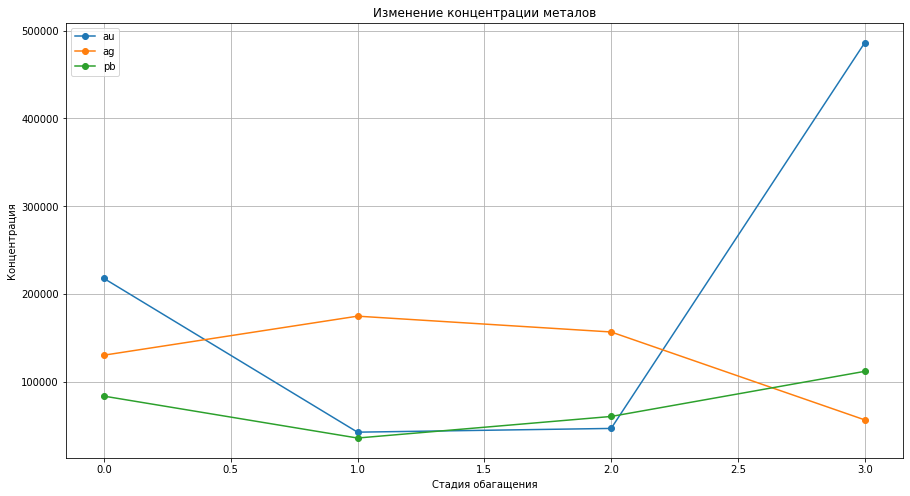

In [15]:
# График для наглядности изменения концентрации
list_label = clenar_list['stage'].tolist()
 
clenar_list.plot(figsize=(15,8), label=list_label, marker='o', grid='True')     


plt.legend(loc='upper left')
#plt.xticks(list_label.index)
plt.xlabel('Стадия обагащения')
#plt.xticks(rotation=90)
plt.ylabel('Концентрация')
plt.title('Изменение концентрации металов')
plt.show()

In [17]:
# Изучаем концентрацию
concentraiton_name = []
concentraiton_name.append(['rougher.input.feed_au', 
                      'rougher.input.feed_ag',
                      'rougher.input.feed_pb',
                      'rougher.input.feed_sol'])
concentraiton_name.append(['primary_cleaner.output.concentrate_au',
                           'primary_cleaner.output.concentrate_ag',
                           'primary_cleaner.output.concentrate_pb',
                           'primary_cleaner.output.concentrate_sol' ]) 
concentraiton_name.append(['final.output.concentrate_au', 
                           'final.output.concentrate_ag',
                           'final.output.concentrate_pb', 
                           'final.output.concentrate_sol' ]) 
#print(concentraiton_name)

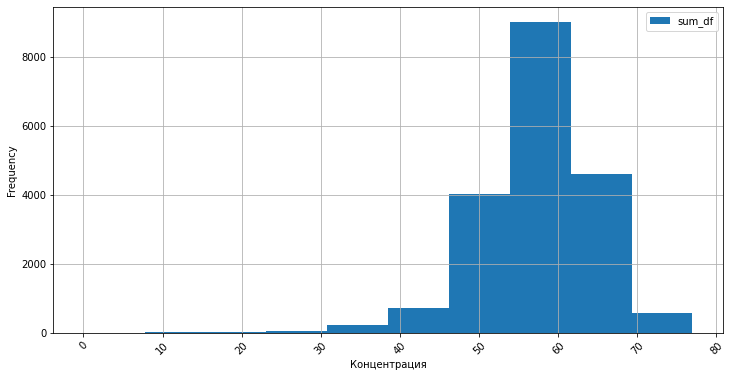

<Figure size 1440x864 with 0 Axes>

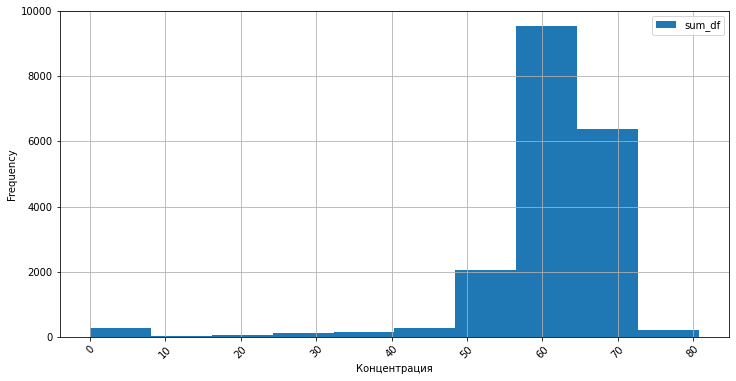

<Figure size 1440x864 with 0 Axes>

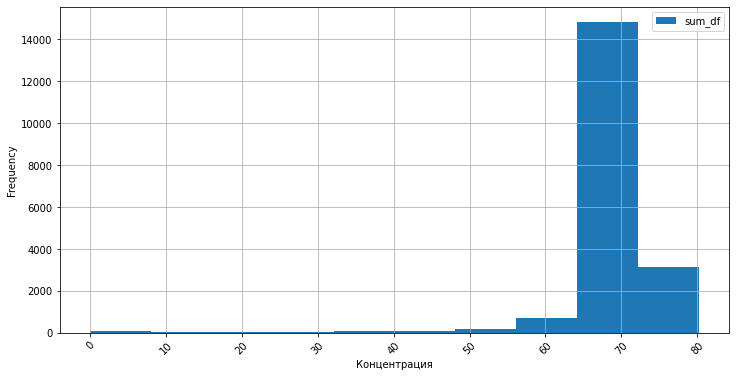

<Figure size 1440x864 with 0 Axes>

In [18]:
#concentraiton_name[0]
for i in concentraiton_name:
    df_gr = df_full[i].reset_index()
    df_gr['sum_df'] = df_gr[i[0]] + df_gr[i[1]] + df_gr[i[2]] + df_gr[i[3]]
    #print(df_gr['sum_df'])
    df_gr.plot(x='date', y='sum_df', figsize=(12,6), grid=True, kind='hist')
    plt.xticks(rotation=45)
    plt.xlabel('Концентрация')
    plt.figure(figsize=(20, 12))
    plt.show()

In [19]:
#Cуммарную концентрацию всех веществ на разных стадиях
#df_full.info()
df_filter = df_full
print(len(df_full))
def filteration(df_full, elm):
    df_filter = df_full[((df_full[elm[0]] + 
                          df_full[elm[1]] + 
                          df_full[elm[2]] + 
                          df_full[elm[3]])>0)]
    return df_filter

for i in concentraiton_name:
    df_filter = filteration(df_filter, i)
    print(len(df_filter)) 
   

19439
19245
18820
18573


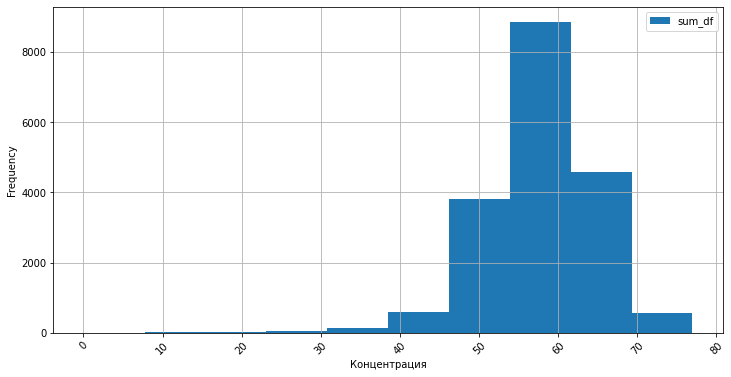

<Figure size 1440x864 with 0 Axes>

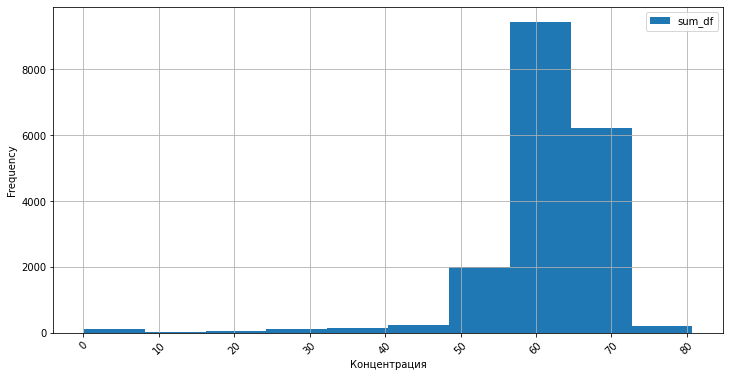

<Figure size 1440x864 with 0 Axes>

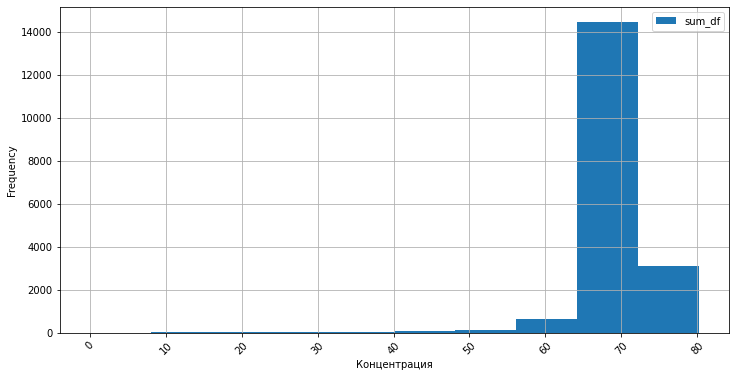

<Figure size 1440x864 with 0 Axes>

In [20]:
for i in concentraiton_name:
    df_gr = df_filter
    df_gr['sum_df'] = df_gr[i[0]] + df_gr[i[1]] + df_gr[i[2]] + df_gr[i[3]]
    #print(df_gr['sum_df'])
    df_gr.plot(x='date', y='sum_df', figsize=(12,6), grid=True, kind='hist')
    plt.xticks(rotation=45)
    plt.xlabel('Концентрация')
    plt.figure(figsize=(20, 12))
    plt.show()

In [21]:
# Убераем лишнее из датасетов
df_test = df_test.reset_index(drop=True)
df_test = df_test.loc[df_test['date'].isin(df_filter['date'])]

<div style="border:solid green 2px; padding: 20px" class="alert alert-info">
    <b>
        <p>
          Данные подготовлены для обучения модели, убраны лишние данные, выбросы.
        </p>
    </b>
</div>

## Модель

In [22]:
target_train_1 = df_train_55['rougher.output.recovery']
target_train_2 = df_train_55['final.output.recovery']
features_train = df_train_55.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
scaler =  StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
                                                 
target_test_1 = df_test['rougher.output.recovery']
target_tes_2 = df_test['final.output.recovery']
features_test = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
scaler =  StandardScaler()
scaler.fit(features_test)
features_test = scaler.transform(features_train)

#display(features_train)
#display(features_tes)

In [23]:
# Рассчет sMAPE

def sMAPE(target, pred): 
    n = len(target)
    return -100/n * np.sum(np.abs(target - pred)/((np.abs(target) + np.abs(pred))/2))

sMAPE_score = make_scorer(sMAPE, greater_is_better=False)

def total_sMAPE(smape_r, smape_f):
    return 0.25*smape_r + 0.75*smape_f


In [24]:
# Характеристики для сравнения
dummy_regressor_rougher = DummyRegressor(strategy="median") 
dummy_regressor_rougher.fit(features_train, target_train_1)
dummy_rougher_pred = dummy_regressor_rougher.predict(features_train)
smape_dummy_rougher = sMAPE(target_train_1, dummy_rougher_pred)

print(smape_dummy_rougher)

#print(dummy_regressor_rougher)

-10.472801956400412


In [25]:
random_state = 123
cv = 5
models = [DecisionTreeRegressor(random_state = random_state), 
          RandomForestRegressor(random_state=random_state), 
          LinearRegression()]


results_cross_val = []

for model in models: 
    
    scorer = make_scorer(sMAPE, greater_is_better=False) 
    
    cross_val_score_rougher = cross_val_score(model, 
                                              features_train, 
                                              target_train_1, 
                                              cv=cv, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, 
                                            features_train, 
                                            target_train_2, 
                                            cv=cv, scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher, 
                              'cross_val_score_final': cross_val_score_final})    
             
    pd.DataFrame(results_cross_val)


In [26]:
print('Ожидаемый результат', -1 * smape_dummy_rougher)
print('Результат для дерева регрессии', results_cross_val[0])
print('Результат для случайного леса', results_cross_val[1])
print('Результат для линейной регресии', results_cross_val[2])

Ожидаемый результат 10.472801956400412
Результат для дерева регрессии {'model name': 'DecisionTreeRegressor', 'cross_val_score_rougher': 18.918164778102188, 'cross_val_score_final': 17.810942172472558}
Результат для случайного леса {'model name': 'RandomForestRegressor', 'cross_val_score_rougher': 13.276443943665706, 'cross_val_score_final': 10.741202023063163}
Результат для линейной регресии {'model name': 'LinearRegression', 'cross_val_score_rougher': 11.925343594602728, 'cross_val_score_final': 9.7460811061901}


<div style="border:solid green 2px; padding: 20px" class="alert alert-info">
    <b>
        <p>
          Что же лучший результат у линейной регресии посмотрим как она поведет себя на тестовой выборке 
        </p>
    </b>
</div>

In [34]:
model_linear = LinearRegression()
scores_rougher = cross_val_score(model_linear, features_train, target_train_1, cv=5, scoring=scorer) 
final_score_1 = scores_rougher.sum() / len(scores_rougher)

model_linear = LinearRegression()
scores_rougher = cross_val_score(model_linear, features_train, target_train_2, cv=5, scoring=scorer) 
final_score_2 = scores_rougher.sum() / len(scores_rougher)

print(final_score_1)
print(final_score_2)

11.925343594602728
9.7460811061901


<div style="border:solid green 2px; padding: 20px" class="alert alert-info">
    <b>
        <p>
         Лучший результат показала, модель RandomForestRegressor с использованием данных флотации, её и будем рекомендовать заказчику.
        </p>
    </b>
</div>